# CS4662 HW 1

a- Read the dataset file “Cancer.csv” (from github using the following command), and assign
it to a Pandas DataFrame:
df = pd.read_csv("https://github.com/mpourhoma/CS4662/raw/master/Cancer.csv")
Check out the dataset. As you see, the dataset includes 9 numerical features. The last
column is the binary label (“1” means it is a malignant cancer, “0” means it is a benign
tumor). You will use all 9 features in this homework.


In [902]:
# The following line will import DecisionTreeClassifier "Class"
# DecisionTreeClassifier is name of a "sklearn class" to perform "Decision Tree Classification" 

from sklearn.tree import DecisionTreeClassifier
# Importing the required packages and libraries
# we will need numpy and pandas later
import numpy as np
import pandas as pd

from sklearn.utils import resample


In [903]:
# reading a CSV file directly from Web, and store it in a pandas DataFrame:
# "read_csv" is a pandas function to read csv files from web or local device:

df = pd.read_csv("https://github.com/mpourhoma/CS4662/raw/master/Cancer.csv")


In [904]:
feature_cols = ['Clump_Thickness','Uniformity_of_Cell_Size','Uniformity_of_Cell_Shape','Marginal_Adhesion','Single_Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses']

# use the above list to select the features from the original DataFrame
X = df[feature_cols]  



In [905]:
y = df['Malignant_Cancer']  # or: iris_df['label']

# checking the label vector by printing every 10 values

b- Use sklearn functions to split the dataset into testing and training sets with the following
parameters: test_size=0.3, random_state=2.

In [906]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

c- Use “Decision Tree Classifier” to predict Cancer based on the training/testing datasets
that you built in part (h). Then, calculate and report the accuracy and AUC of your
classifier. Later in part (g), you will plot the ROC curve as well. Use this command to define
your tree: my_DecisionTree = DecisionTreeClassifier(random_state=2).

In [907]:
# In the following line, "my_decisiontree" is instantiated as an "object" of DecisionTreeClassifier "class". 

my_decisiontree = DecisionTreeClassifier(random_state=2)
# We can use the method "fit" of the "object my_decisiontree" along with training dataset and labels to train the model.

my_decisiontree.fit(X_train, y_train)
y_predict = my_decisiontree.predict(X_test)
from sklearn.metrics import accuracy_score
# We can now compare the "predicted labels" for the Testing Set with its "actual labels" to evaluate the accuracy 
# Function "accuracy_score" from "sklearn.metrics" will perform the element-to-element comparision and returns the 
# portion of correct predictions:

score = accuracy_score(y_test, y_predict)

print('accuracy: ',score)

accuracy:  0.8666666666666667


In [908]:
y_predict_lr = my_decisiontree.predict(X_test)

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_lr = my_decisiontree.predict_proba(X_test)


AUC:  0.8697478991596639


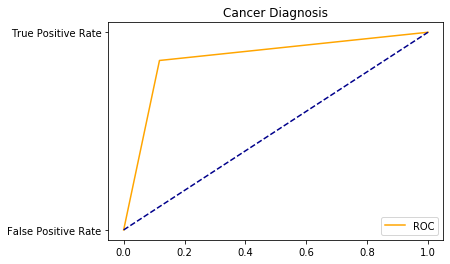

In [909]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Takes in False Positive Rate(fpr) and True Positive rate(tpr)
auc = roc_auc_score(y_test, y_predict)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_lr[:,1], pos_label=1)
AUC = metrics.auc(fpr, tpr)
print('AUC: ',AUC)
# Positive values from predictions

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.plot('False Positive Rate')
plt.plot('True Positive Rate')
plt.title('Cancer Diagnosis')
plt.legend()
plt.show()



d- Now, we want to perform “Bagging” based on 29 “base decision tree classifiers”.
Note: you should write your own code to perform Bagging (don’t use scikit-learn functions
for Bagging!)
To do so, you need to perform bootstrapping first. You can write a “for” loop with loop
variable i=0…18. In each iteration of the loop, you have to:
- make a bootstarp sample of the original “Training” Dataset (build in part(b)) with size
of bootstarp_size = 0.8*(Size of the original dataset). You can use the following
command to generate a random bootstrap dataset (“i" is the variable of the loop, so
the random_state changes in each iteration):
resample(X_train, n_samples = bootstarp_size , random_state=i , replace = True)
- Define and train a new base decision tree classifier on this dataset in each iteration:
Base_DecisionTree = DecisionTreeClassifier(random_state=2).
- Test “this base classifier” on the original “Testing” Dataset build in part(b), and save
the prediction results for all testing samples.
Then, Perform Voting to make the final decision on each data sample based on the votes
of all 29 classifiers. Finally, calculate and report the accuracy and AUC of your Bagging
method.
NOTE: You need to calculate the probability of “malignant cancer” to be able to find AUC
and plot the ROC curve. As mentioned in the class, you can consider the average
(mean) of the votes as the probability for each sample.

Accuracy:  0.9111111111111111
AUC:  0.9380252100840336


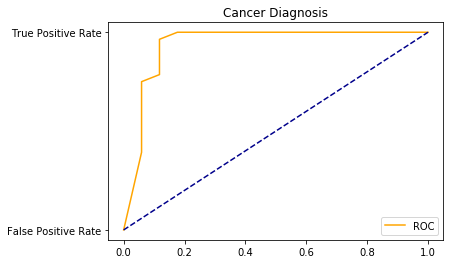

In [910]:
predictionlist = []
X_train_Sample_size = int(np.floor(0.8*len(X_train)))

for i in range(29):
    X_train_i , Y_train_i = resample(X_train,y_train, n_samples = X_train_Sample_size , random_state=i , replace = True)
    Base_DecisionTree = DecisionTreeClassifier(random_state=2)
    Base_DecisionTree.fit(X_train_i, Y_train_i)
    y_predict_dt = Base_DecisionTree.predict(X_test)
    predictionlist.insert(i, y_predict_dt)
    num_all = len(X_test)

y_predictFinal = []

for j in range(0, num_all):
    allpositives = 0
    for i in range(29):
        allpositives += predictionlist[i][j]
    if allpositives > 29/2: y_predictFinal.insert(j,1) 
    else: y_predictFinal.insert(j,0)

        
# calculate accuracy of the bagging (voting) method
score2 = accuracy_score(y_test, y_predictFinal) 
print('Accuracy: ',score2)

bagging_results = pd.DataFrame()
bagging_results['actual'] = y_test
bagging_results['prediction'] = voting
#print(voting)
proba_All = [[]]
proba_Zero = []
proba_One=[]

for i in range(45): 
    countZero = 0
    countOne = 0
    for j in range(29):
        #ans.append(result[j][i])
        if(predictionlist[j][i] == 0):
            countZero+= 1;
        #ans2.append(countOne)
        
    proba_Zero.append(countZero/29.0)
    proba_One.append((29-countZero)/29.0)
    proba_All[i].append((countZero/29.0))
    proba_All[i].append((29-countZero)/29.0)
    proba_All.append([])
    
proba_All.remove([])    
#print(proba_All)

fpr2, tpr2, thresholds = metrics.roc_curve(y_test, proba_One, pos_label=1)
AUC2 = metrics.auc(fpr2, tpr2)
print('AUC: ',AUC2)
# Positive values from predictions

plt.plot(fpr2, tpr2, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.plot('False Positive Rate')
plt.plot('True Positive Rate')
plt.title('Cancer Diagnosis')
plt.legend()
plt.show()

e- Use scikit-learn “Adaboost” classifier to predict Cancer based on the training/testing
datasets that you built in part (b). Then, calculate and report the accuracy and AUC of
your classifier. Use this command to import and define your classifier:
from sklearn.ensemble import AdaBoostClassifier
my_AdaBoost = AdaBoostClassifier(n_estimators = 29,random_state=2)

In [911]:
from sklearn.ensemble import AdaBoostClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
abc = AdaBoostClassifier(n_estimators=29,random_state=2)
# Train Adaboost Classifer
modelabc = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = modelabc.predict(X_test)

from sklearn.metrics import accuracy_score

score3 = accuracy_score(y_test, y_pred)

print("Accuracy:",score3)

Accuracy: 0.9555555555555556


AUC:  0.9653361344537815


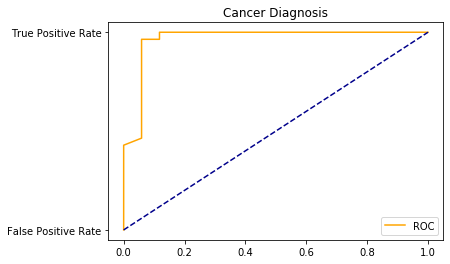

In [912]:
# Takes in False Positive Rate(fpr) and True Positive rate(tpr)
y_predict_prob_lr3 = abc.predict_proba(X_test)
auc = roc_auc_score(y_test, y_pred)
fpr3, tpr3, thresholds = metrics.roc_curve(y_test, y_predict_prob_lr3[:,1], pos_label=1)
AUC3 = metrics.auc(fpr3, tpr3)
print('AUC: ',AUC3)
# Positive values from predictions

plt.plot(fpr3, tpr3, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.plot('False Positive Rate')
plt.plot('True Positive Rate')
plt.title('Cancer Diagnosis')
plt.legend()
plt.show()


f- In this section, we use an extremely popular Boosting algorithm called “XGBoost”. This
algorithm is not included in sklearn, so you need to install the XGBoost library. Please see
this for more infor: https://xgboost.readthedocs.io/en/latest/build.html
Mac users can easily install it with “pip install xgboost”.
Repeat part (e) with XGBoost. Use this command to import and define your classifier:
from xgboost import XGBClassifier
my_XGBoost = XGBClassifier(n_estimators = 29,random_state=2)

In [913]:
from xgboost import XGBClassifier 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
my_XGBoost = XGBClassifier(n_estimators = 29,random_state=2)

# Train Adaboost Classifer
modelxgboost = my_XGBoost.fit(X_train, y_train)

#Predict the response for test dataset
y_predict = modelxgboost.predict(X_test)

from sklearn.metrics import accuracy_score

score4 = accuracy_score(y_test, y_predict)

print("Accuracy: ",score4)

Accuracy:  0.9555555555555556


AUC:  0.9621848739495799


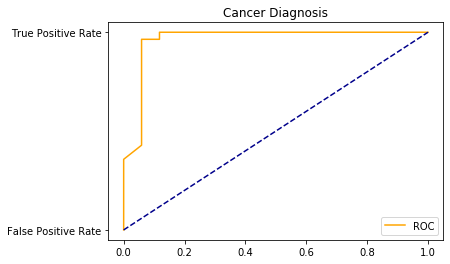

In [914]:
y_predict_prob_lr4 = my_XGBoost.predict_proba(X_test)
auc = roc_auc_score(y_test, y_pred)
fpr4, tpr4, thresholds = metrics.roc_curve(y_test, y_predict_prob_lr4[:,1], pos_label=1)
AUC4 = metrics.auc(fpr4, tpr4)
print('AUC: ',AUC4)
# Positive values from predictions

plt.plot(fpr4, tpr4, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.plot('False Positive Rate')
plt.plot('True Positive Rate')
plt.title('Cancer Diagnosis')
plt.legend()
plt.show()


g- Use scikit-learn “Random Forest” classifier to predict Cancer based on the training/testing
datasets that you built in part (b). Then, calculate and report the accuracy and AUC of
your classifier. Use this command to import and define your classifier:
from sklearn.ensemble import RandomForestClassifier
my_RandomForest =
RandomForestClassifier(n_estimators = 29, bootstrap = True, random_state=2)

In [915]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
my_RandomForest = RandomForestClassifier(n_estimators=29, bootstrap=True, random_state=2)
my_RandomForest.fit(X_train, y_train)

rf_predict = my_RandomForest.predict(X_test)

score5 = accuracy_score(y_test, rf_predict)

rf_results = pd.DataFrame()
rf_results['actual'] = y_test
rf_results['prediction'] = rf_predict

print('Accuracy for Randomforest: ',score5)

Accuracy for Randomforest:  0.9555555555555556


AUC:  0.9516806722689075


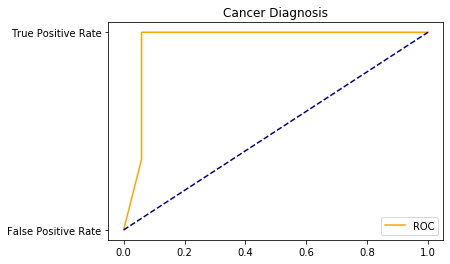

In [916]:
y_predict_prob_lr5 = my_RandomForest.predict_proba(X_test)

auc = roc_auc_score(y_test, y_predict)
fpr5, tpr5, thresholds = metrics.roc_curve(y_test, y_predict_prob_lr5[:,1], pos_label=1)
AUC5 = metrics.auc(fpr5, tpr5)
print('AUC: ',AUC5)
# Positive values from predictions

plt.plot(fpr5, tpr5, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.plot('False Positive Rate')
plt.plot('True Positive Rate')
plt.title('Cancer Diagnosis')
plt.legend()
plt.show()


h- Now, plot the ROC curves of your algorithms in parts (c), (d), (e), (f), (g) in a single plane
with different colors along with the name of each method. Show the AUCs on the graph
as well.
- Which algorithm is the best w.r.t the AUC value?
- Which algorithm is the best w.r.t the Accuracy value?
- Which algorithm is the best when we want a False Positive Rate of %7?

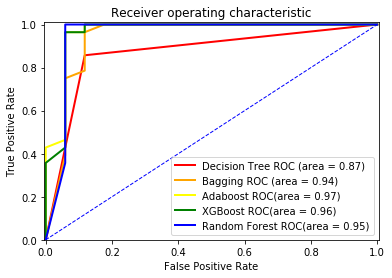

In [917]:
%matplotlib inline

plt.figure()

# Roc Curve1 Decision Tree Classifier:
plt.plot(fpr, tpr, color='red', lw=2, label='Decision Tree ROC (area = %0.2f)' % AUC)

# Roc Curve2 Bagging:
plt.plot(fpr2, tpr2, color='orange', lw=2,  label='Bagging ROC (area = %0.2f)' % AUC2)

# Roc Curve3 Adaboost:
plt.plot(fpr3, tpr3, color='yellow', lw=2, label='Adaboost ROC(area = %0.2f)' % AUC3)

 #Roc Curve4 XGBoost:
plt.plot(fpr4, tpr4, color='green', lw=2, label='XGBoost ROC(area = %0.2f)' % AUC4)


# Roc Curve5 Random Forest:
plt.plot(fpr5, tpr5, color='blue', lw=2, 
         label='Random Forest ROC(area = %0.2f)' % AUC5)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

In [918]:
print('Accuracy for Decision Tree: ',score)
print('Accuracy for bagging: ',score2)
print('Accuracy for Adaboost: ',score3)
print('Accuracy for XGboost: ',score4)
print('Accuracy for Random Forest: ',score5)


Accuracy for Decision Tree:  0.8666666666666667
Accuracy for bagging:  0.9111111111111111
Accuracy for Adaboost:  0.9555555555555556
Accuracy for XGboost:  0.9555555555555556
Accuracy for Random Forest:  0.9555555555555556


### Which algorithm is the best w.r.t the AUC value?


In [919]:
print('Adaboost algorithm is the best w.r.t the AUC value')
print('AUC value for Adaboost: ',AUC3)

Adaboost algorithm is the best w.r.t the AUC value
AUC value for Adaboost:  0.9653361344537815


### Which algorithm is the best w.r.t the Accuracy value?


In [920]:
print('Adaboost,XGboost and Random Forest algorithm is the best w.r.t the AUC value')
print('AUC value : ',score3)

Adaboost,XGboost and Random Forest algorithm is the best w.r.t the AUC value
AUC value :  0.9555555555555556


### Which algorithm is the best when we want a False Positive Rate of %7?

Random Forest